# **Importing Modules**

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import f_oneway, kruskal, pearsonr, spearmanr,shapiro

In [2]:
custom_colors = ["#8B4513","#A0522D","#D2691E","#CD853F","#DEB887","#F5F5DC","#F5DEB3","#FAEBD7","#FFE4C4","#FFDAB9"]

#  **Exploring Dataset**

In [3]:
df_demand = pd.read_excel('/content/drive/MyDrive/Data/Final Project/Demand.xlsx')
df_demand.head()

,DemandDateTime,Demand
0,2013-01-01 00:00:00,Normal
1,2013-01-01 00:30:00,Normal
2,2013-01-01 01:00:00,Normal
3,2013-01-01 01:30:00,Normal
4,2013-01-01 02:00:00,Normal


In [4]:
df_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DemandDateTime  17520 non-null  datetime64[ns]
 1   Demand          17520 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 273.9+ KB


In [5]:
df_demand.shape

(17520, 2)

In [6]:
df_SE1 = pd.read_csv('/content/drive/MyDrive/Data/Final Project/Sites Energy Consumption Part_001.csv')
df_SE2 = pd.read_csv('/content/drive/MyDrive/Data/Final Project/Sites Energy Consumption Part_002.csv')
df_SE3 = pd.read_csv('/content/drive/MyDrive/Data/Final Project/Sites Energy Consumption Part_003.csv')


# Print the shape of each data file
print(f"Shape of Sites Energy Consumption Part_001: {df_SE1.shape}")
print(f"Shape of Sites Energy Consumption Part_002: {df_SE2.shape}")
print(f"Shape of Sites Energy Consumption Part_003: {df_SE3.shape}")

Shape of Sites Energy Consumption Part_001: (484387, 5)
Shape of Sites Energy Consumption Part_002: (444898, 5)
Shape of Sites Energy Consumption Part_003: (450967, 5)


In [7]:
df_SE1.head()

,cell_id,DateTime,KWH/hh (per half hour),site_id,region
0,MAC000002,"00:00:00 13,01,01",0.219,A,A
1,MAC000002,"00:30:00 13,01,01",0.241,A,A
2,MAC000002,"01:00:00 13,01,01",0.191,A,A
3,MAC000002,"01:30:00 13,01,01",0.235,A,A
4,MAC000002,"02:00:00 13,01,01",0.182,A,A


In [8]:
df_SE2.head()

,cell_id,DateTime,KWH/hh (per half hour),site_id,region
0,MAC000036,"00:00:00 13,01,01",0.006,E,A
1,MAC000036,"00:30:00 13,01,01",0.017,E,A
2,MAC000036,"01:00:00 13,01,01",0.059,E,A
3,MAC000036,"01:30:00 13,01,01",0.000,E,A
4,MAC000036,"02:00:00 13,01,01",0.000,E,A


In [9]:
df_SE3.head()

,cell_id,DateTime,KWH/hh (per half hour),site_id,region
0,MAC000069,"22:30:00 13,12,05",0.063,G,C
1,MAC000069,"23:00:00 13,12,05",0.106,G,C
2,MAC000069,"23:30:00 13,12,05",0.029,G,C
3,MAC000069,"00:00:00 13,13,05",0.108,G,C
4,MAC000069,"00:30:00 13,13,05",0.033,G,C


# **Combining | Cleaning Data**

In [10]:
# Merge the datasets using vertical concatenation
df_combined = pd.concat([df_SE1, df_SE2, df_SE3], ignore_index=True)


print(f"Shape of the combined dataset: {df_combined.shape}")

Shape of the combined dataset: (1380252, 5)


In [11]:
df_combined.head()

,cell_id,DateTime,KWH/hh (per half hour),site_id,region
0,MAC000002,"00:00:00 13,01,01",0.219,A,A
1,MAC000002,"00:30:00 13,01,01",0.241,A,A
2,MAC000002,"01:00:00 13,01,01",0.191,A,A
3,MAC000002,"01:30:00 13,01,01",0.235,A,A
4,MAC000002,"02:00:00 13,01,01",0.182,A,A


In [12]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380252 entries, 0 to 1380251
Data columns (total 5 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   cell_id                  1380252 non-null  object 
 1   DateTime                 1380252 non-null  object 
 2   KWH/hh (per half hour)   1380252 non-null  float64
 3   site_id                  1380252 non-null  object 
 4   region                   1380252 non-null  object 
dtypes: float64(1), object(4)
memory usage: 52.7+ MB


In [13]:
df_combined.isna().sum()

,0
cell_id,0
DateTime,0
KWH/hh (per half hour),0
site_id,0
region,0


In [14]:
df_combined.duplicated().sum()

942

In [15]:
duplicates = df_combined[df_combined.duplicated()]
print("Duplicate rows:")

duplicates

Duplicate rows:


,cell_id,DateTime,KWH/hh (per half hour),site_id,region
961,MAC000002,"00:00:00 13,21,01",0.210,A,A
2450,MAC000002,"00:00:00 13,21,02",0.216,A,A
3939,MAC000002,"00:00:00 13,24,03",0.486,A,A
5428,MAC000002,"00:00:00 13,24,04",0.147,A,A
6917,MAC000002,"00:00:00 13,25,05",0.170,A,A
...,...,...,...,...,...
1373150,MAC000100,"00:00:00 13,26,07",0.104,N,B
1374639,MAC000100,"00:00:00 13,26,08",0.142,N,B
1376128,MAC000100,"00:00:00 13,26,09",0.112,N,B
1377617,MAC000100,"00:00:00 13,27,10",0.104,N,B


In [16]:
df_combined.drop_duplicates(inplace=True)

df_combined.shape

(1379310, 5)

In [17]:
df_combined['DateTime'].head()

,DateTime
0,"00:00:00 13,01,01"
1,"00:30:00 13,01,01"
2,"01:00:00 13,01,01"
3,"01:30:00 13,01,01"
4,"02:00:00 13,01,01"


In [18]:
# Attempt to parse while coercing errors
df_combined['DateTime'] = pd.to_datetime(df_combined['DateTime'], format='%H:%M:%S %y,%m,%d', errors='coerce')

# Identify problematic rows
invalid_rows = df_combined[df_combined['DateTime'].isna()]
invalid_rows


,cell_id,DateTime,KWH/hh (per half hour),site_id,region
576,MAC000002,NaT,0.255,A,A
577,MAC000002,NaT,0.247,A,A
578,MAC000002,NaT,0.219,A,A
579,MAC000002,NaT,0.263,A,A
580,MAC000002,NaT,0.212,A,A
...,...,...,...,...,...
1380247,MAC000100,NaT,0.260,N,B
1380248,MAC000100,NaT,0.267,N,B
1380249,MAC000100,NaT,0.274,N,B
1380250,MAC000100,NaT,0.312,N,B


In [19]:
df_combined.dropna(subset=['DateTime'], inplace=True)

In [20]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 545451 entries, 0 to 1379873
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   cell_id                  545451 non-null  object        
 1   DateTime                 545451 non-null  datetime64[ns]
 2   KWH/hh (per half hour)   545451 non-null  float64       
 3   site_id                  545451 non-null  object        
 4   region                   545451 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 25.0+ MB


---

## **Combining Orginal Data with Demand Data**

In [21]:
df_demand.rename(columns={'DemandDateTime': 'DateTime'}, inplace=True)

# Merge the two datasets on the 'DateTime' column
merged_dataset = pd.merge(
    df_combined,
    df_demand,
    on='DateTime',
    how='inner'
)

In [22]:
merged_dataset.head()

,cell_id,DateTime,KWH/hh (per half hour),site_id,region,Demand
0,MAC000002,2013-01-01 00:00:00,0.219,A,A,Normal
1,MAC000002,2013-01-01 00:30:00,0.241,A,A,Normal
2,MAC000002,2013-01-01 01:00:00,0.191,A,A,Normal
3,MAC000002,2013-01-01 01:30:00,0.235,A,A,Normal
4,MAC000002,2013-01-01 02:00:00,0.182,A,A,Normal


In [23]:
merged_dataset.duplicated().sum()

0

In [24]:
merged_dataset.isna().any()

,0
cell_id,False
DateTime,False
KWH/hh (per half hour),False
site_id,False
region,False
Demand,False


In [25]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545451 entries, 0 to 545450
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   cell_id                  545451 non-null  object        
 1   DateTime                 545451 non-null  datetime64[ns]
 2   KWH/hh (per half hour)   545451 non-null  float64       
 3   site_id                  545451 non-null  object        
 4   region                   545451 non-null  object        
 5   Demand                   545451 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 25.0+ MB


# **Feature Engineering | Data Tranformation**

In [26]:
merged_dataset['Demand'].unique()

array(['Normal', 'Low', 'High', 'Normall'], dtype=object)

In [27]:
merged_dataset['Demand'] = merged_dataset['Demand'].replace('Normall', 'Normal')

In [28]:
demand_price_map = {
    'High': 77.21,
    'Normal': 19.46,
    'Low': 6.89
}

merged_dataset['DemandPrice'] = merged_dataset['Demand'].map(demand_price_map)

In [29]:
merged_dataset['Cost_per_half_hour'] = (merged_dataset['KWH/hh (per half hour) '] * merged_dataset['DemandPrice']) / 100  # Convert to pounds

In [30]:
#Region-Specific Aggregations
region_avg_kwh = merged_dataset.groupby('region')['KWH/hh (per half hour) '].transform('mean')
region_avg_cost = merged_dataset.groupby('region')['Cost_per_half_hour'].transform('mean')

merged_dataset['Region_Avg_KWH'] = region_avg_kwh
merged_dataset['Region_Avg_Cost'] = region_avg_cost

In [31]:
#Site-Specific Metrics
site_total_kwh = merged_dataset.groupby('site_id')['KWH/hh (per half hour) '].transform('sum')
site_total_cost = merged_dataset.groupby('site_id')['Cost_per_half_hour'].transform('sum')

merged_dataset['Site_Total_KWH'] = site_total_kwh
merged_dataset['Site_Total_Cost'] = site_total_cost

In [32]:
#Create Time-Based Features
merged_dataset['Hour'] = merged_dataset['DateTime'].dt.hour
merged_dataset['Day_of_Week'] = merged_dataset['DateTime'].dt.dayofweek  # 0=Monday, 6=Sunday
merged_dataset['Month'] = merged_dataset['DateTime'].dt.month

1.   Plot average energy consumption across hours to identify "rush hours" of energy usage.

2.   Average energy usage might be lower on weekends due to industrial slowdowns.

3.   Energy consumption might spike in winter (for heating) or summer (for cooling).


In [33]:
merged_dataset.head()

,cell_id,DateTime,KWH/hh (per half hour),site_id,region,Demand,DemandPrice,Cost_per_half_hour,Region_Avg_KWH,Region_Avg_Cost,Site_Total_KWH,Site_Total_Cost,Hour,Day_of_Week,Month
0,MAC000002,2013-01-01 00:00:00,0.219,A,A,Normal,19.46,0.042617,0.270583,0.055627,8049.173001,1659.768231,0,1,1
1,MAC000002,2013-01-01 00:30:00,0.241,A,A,Normal,19.46,0.046899,0.270583,0.055627,8049.173001,1659.768231,0,1,1
2,MAC000002,2013-01-01 01:00:00,0.191,A,A,Normal,19.46,0.037169,0.270583,0.055627,8049.173001,1659.768231,1,1,1
3,MAC000002,2013-01-01 01:30:00,0.235,A,A,Normal,19.46,0.045731,0.270583,0.055627,8049.173001,1659.768231,1,1,1
4,MAC000002,2013-01-01 02:00:00,0.182,A,A,Normal,19.46,0.035417,0.270583,0.055627,8049.173001,1659.768231,2,1,1


In [34]:
merged_dataset.isna().sum()

,0
cell_id,0
DateTime,0
KWH/hh (per half hour),0
site_id,0
region,0
Demand,0
DemandPrice,0
Cost_per_half_hour,0
Region_Avg_KWH,0
Region_Avg_Cost,0


In [35]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545451 entries, 0 to 545450
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   cell_id                  545451 non-null  object        
 1   DateTime                 545451 non-null  datetime64[ns]
 2   KWH/hh (per half hour)   545451 non-null  float64       
 3   site_id                  545451 non-null  object        
 4   region                   545451 non-null  object        
 5   Demand                   545451 non-null  object        
 6   DemandPrice              545451 non-null  float64       
 7   Cost_per_half_hour       545451 non-null  float64       
 8   Region_Avg_KWH           545451 non-null  float64       
 9   Region_Avg_Cost          545451 non-null  float64       
 10  Site_Total_KWH           545451 non-null  float64       
 11  Site_Total_Cost          545451 non-null  float64       
 12  Hour            

In [36]:
merged_dataset.describe().style.background_gradient(cmap='Oranges')

,DateTime,KWH/hh (per half hour),DemandPrice,Cost_per_half_hour,Region_Avg_KWH,Region_Avg_Cost,Site_Total_KWH,Site_Total_Cost,Hour,Day_of_Week,Month
count,545451,545451.000000,545451.000000,545451.000000,545451.000000,545451.000000,545451.000000,545451.000000,545451.000000,545451.000000,545451.000000
mean,2013-06-22 07:32:46.654382592,0.238625,20.502608,0.048871,0.238625,0.048871,16359.957842,3350.882073,11.499733,2.959096,6.497295
min,2013-01-01 00:00:00,0.000000,6.890000,0.000000,0.195055,0.040114,2706.338000,560.985982,0.000000,0.000000,1.000000
25%,2013-03-12 23:00:00,0.065000,19.460000,0.011676,0.195055,0.040114,5617.007999,1164.580703,5.000000,1.000000,3.000000
50%,2013-06-12 22:00:00,0.136000,19.460000,0.025687,0.247629,0.050152,14166.161998,2906.633892,11.000000,3.000000,6.000000
75%,2013-09-12 23:00:00,0.265000,19.460000,0.052153,0.270583,0.055627,33243.780005,6774.598443,18.000000,5.000000,9.000000
max,2013-12-12 23:30:00,999.000000,77.210000,148.869000,0.270583,0.055627,33243.780005,6774.598443,23.000000,6.000000,12.000000
std,nan,2.241031,11.023872,0.362657,0.032749,0.006669,11068.412053,2254.412565,6.922420,2.003975,3.452157


# **EDA**

## **1. Hourly/Daily Aggregations**

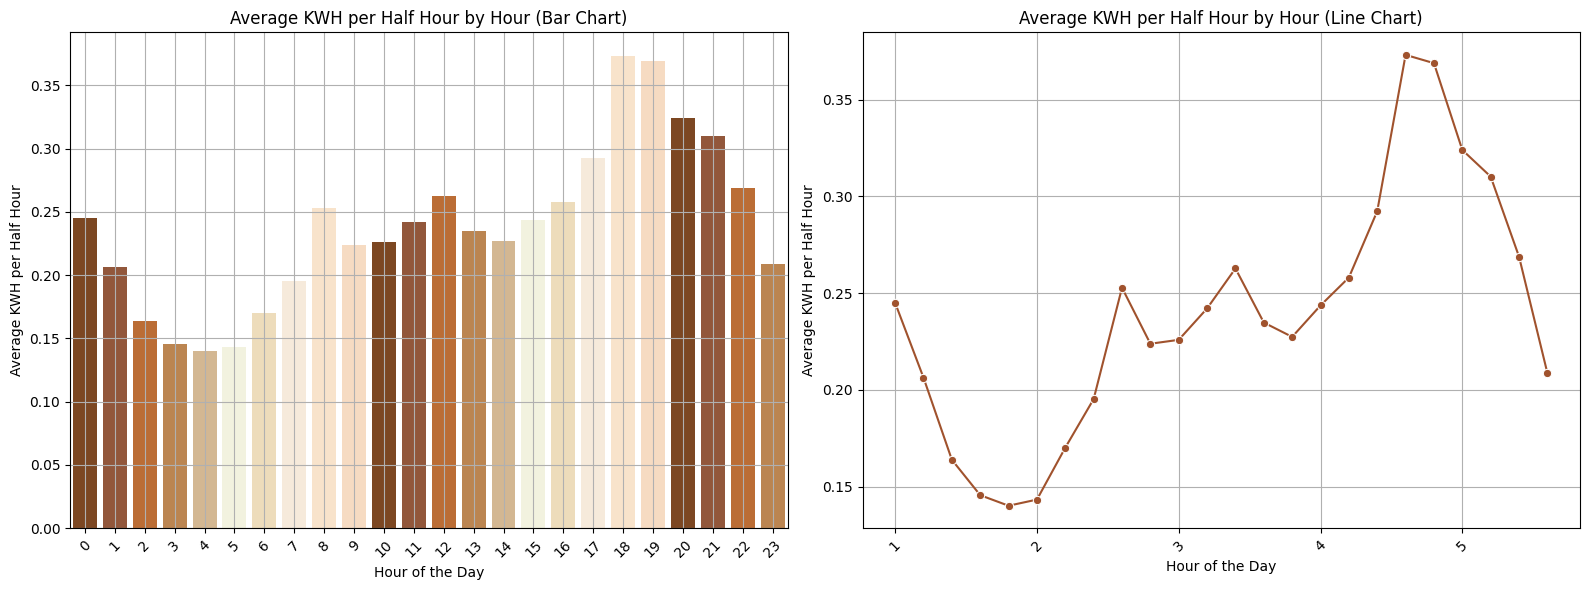

In [37]:
# Aggregate KWH/hh by Hour
hourly_agg = merged_dataset.groupby('Hour')['KWH/hh (per half hour) '].mean().reset_index()

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar Chart for Hourly Aggregation
sns.barplot(x='Hour', y='KWH/hh (per half hour) ', data=hourly_agg, palette= custom_colors, ax=axes[0])
axes[0].set_title('Average KWH per Half Hour by Hour (Bar Chart)')
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Average KWH per Half Hour')
axes[0].set_xticklabels(hourly_agg['Hour'], rotation=45)
axes[0].grid(True)

# Line Chart for Hourly Aggregation
sns.lineplot(x='Hour', y='KWH/hh (per half hour) ', data=hourly_agg, marker='o', color= '#A0522D', ax=axes[1])
axes[1].set_title('Average KWH per Half Hour by Hour (Line Chart)')
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Average KWH per Half Hour')
axes[1].set_xticklabels(hourly_agg['Hour'], rotation=45)
axes[1].grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

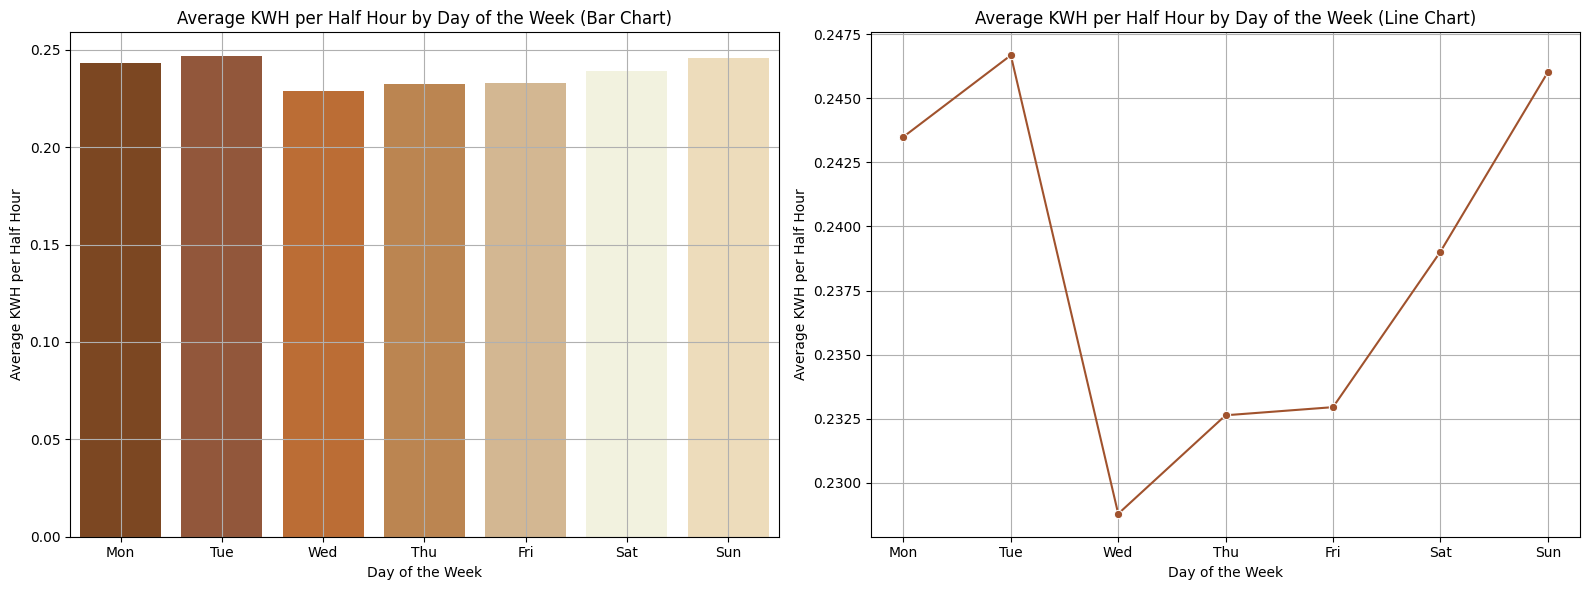

In [38]:
# Aggregate KWH/hh by Day_of_Week
daily_agg = merged_dataset.groupby('Day_of_Week')['KWH/hh (per half hour) '].mean().reset_index()

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar Chart for Daily Aggregation
sns.barplot(x='Day_of_Week', y='KWH/hh (per half hour) ', data=daily_agg, palette=custom_colors, ax=axes[0])
axes[0].set_title('Average KWH per Half Hour by Day of the Week (Bar Chart)')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Average KWH per Half Hour')
axes[0].set_xticks(range(7))
axes[0].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
axes[0].grid(True)

# Line Chart for Daily Aggregation
sns.lineplot(x='Day_of_Week', y='KWH/hh (per half hour) ', data=daily_agg, marker='o', color='#A0522D', ax=axes[1])
axes[1].set_title('Average KWH per Half Hour by Day of the Week (Line Chart)')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Average KWH per Half Hour')
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
axes[1].grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


## **2. Time-Based Trends**

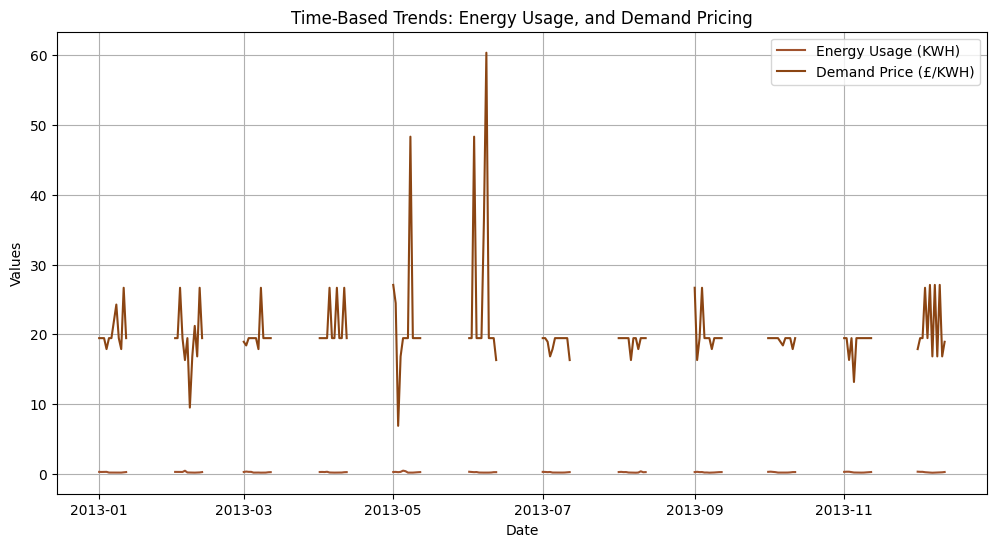

In [39]:
daily_data = merged_dataset.resample('D', on='DateTime')[merged_dataset.select_dtypes(include=np.number).columns].mean()

# Plot line chart for energy usage, cost, and pricing over time
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['KWH/hh (per half hour) '], label='Energy Usage (KWH)', color='#A0522D')
plt.plot(daily_data.index, daily_data['DemandPrice'], label='Demand Price (£/KWH)', color='#8B4513')

# Adding labels and legend
plt.title('Time-Based Trends: Energy Usage, and Demand Pricing')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

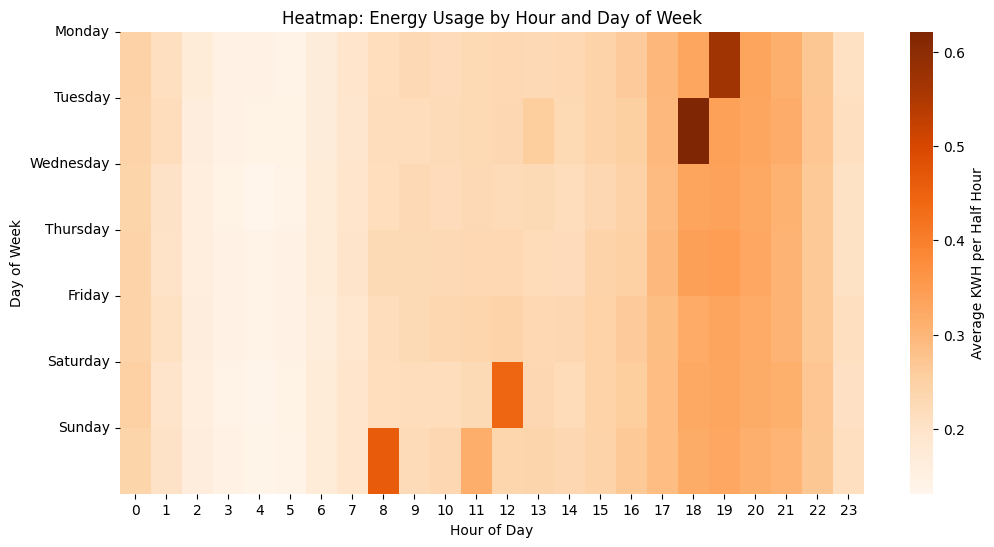

In [41]:
# Create 'Hour' and 'Day_of_Week' features if not already present
merged_dataset['Hour'] = merged_dataset['DateTime'].dt.hour
merged_dataset['Day_of_Week'] = merged_dataset['DateTime'].dt.dayofweek

# Aggregate data by Hour and Day_of_Week for heatmap
heatmap_data = merged_dataset.pivot_table(
    index='Day_of_Week',
    columns='Hour',
    values='KWH/hh (per half hour) ',
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data,
    cmap='Oranges',
    annot=False,
    fmt=".2f",
    cbar_kws={'label': 'Average KWH per Half Hour'}
)
plt.title('Heatmap: Energy Usage by Hour and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.yticks(ticks=np.arange(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=0)
plt.show()


## **3. Demand and Pricing Analysis**

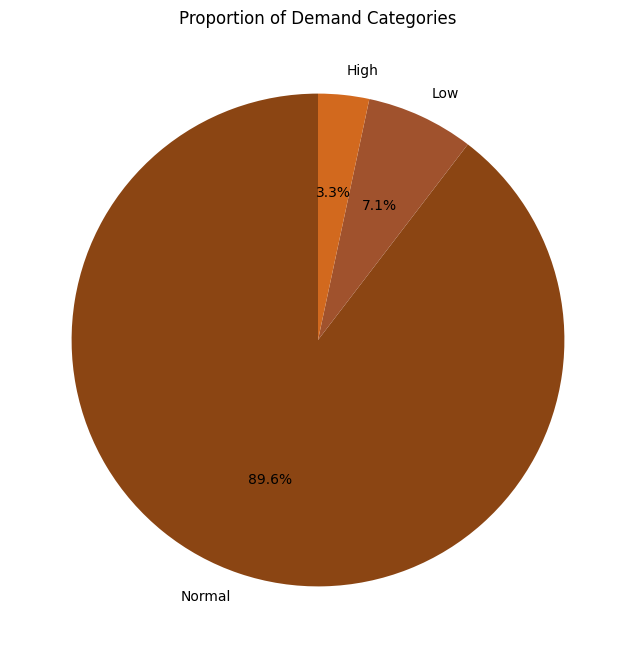

In [42]:
# Calculate the proportion of each Demand category
demand_proportions = merged_dataset['Demand'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    demand_proportions,
    labels=demand_proportions.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette(custom_colors, len(demand_proportions))
)
plt.title('Proportion of Demand Categories')
plt.show()


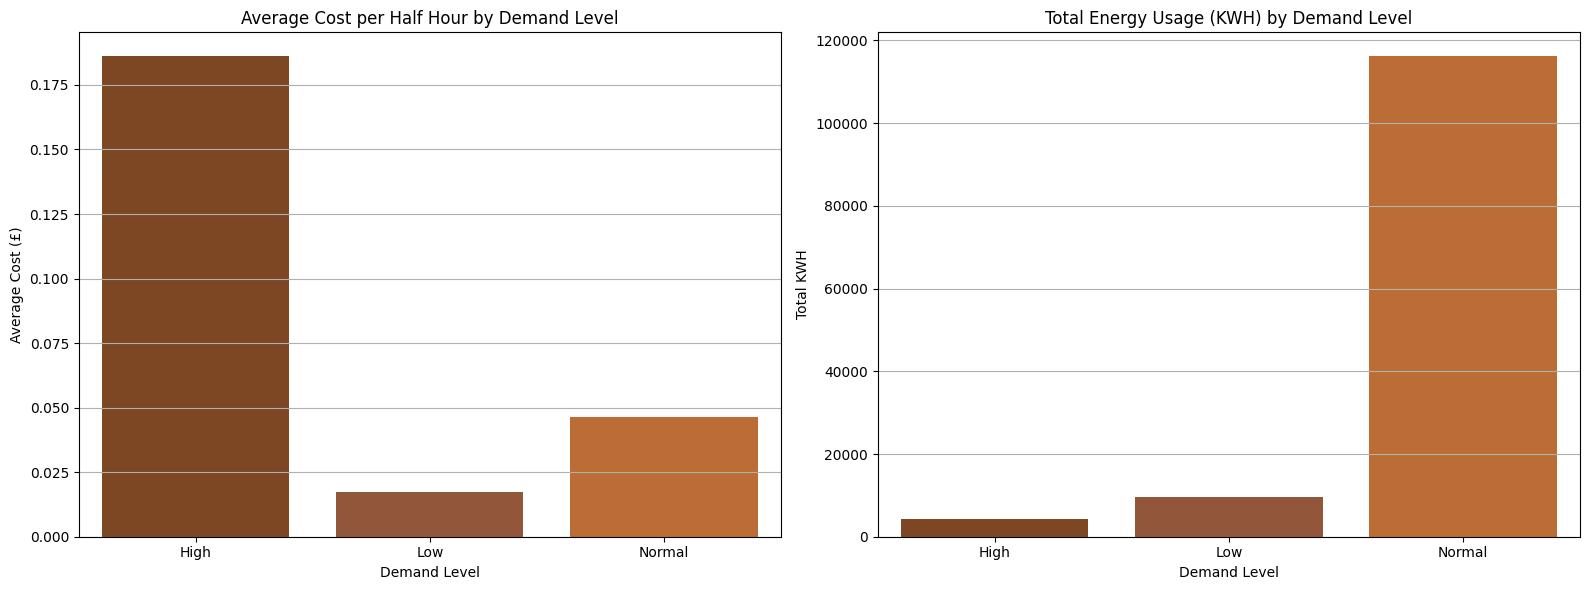

In [43]:
# Aggregate data by 'Demand'
demand_analysis = merged_dataset.groupby('Demand').agg(
    Avg_Cost_per_half_hour=('Cost_per_half_hour', 'mean'),
    Total_KWH=('KWH/hh (per half hour) ', 'sum')
).reset_index()

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# Subplot 1: Average Cost per Half Hour by Demand Level
sns.barplot(ax=axes[0], x='Demand', y='Avg_Cost_per_half_hour', data=demand_analysis, palette=custom_colors)
axes[0].set_title('Average Cost per Half Hour by Demand Level')
axes[0].set_xlabel('Demand Level')
axes[0].set_ylabel('Average Cost (£)')
axes[0].grid(axis='y')

# Subplot 2: Total Energy Usage (KWH) by Demand Level
sns.barplot(ax=axes[1], x='Demand', y='Total_KWH', data=demand_analysis, palette=custom_colors)
axes[1].set_title('Total Energy Usage (KWH) by Demand Level')
axes[1].set_xlabel('Demand Level')
axes[1].set_ylabel('Total KWH')
axes[1].grid(axis='y')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## **4. Region-Based Analysis**

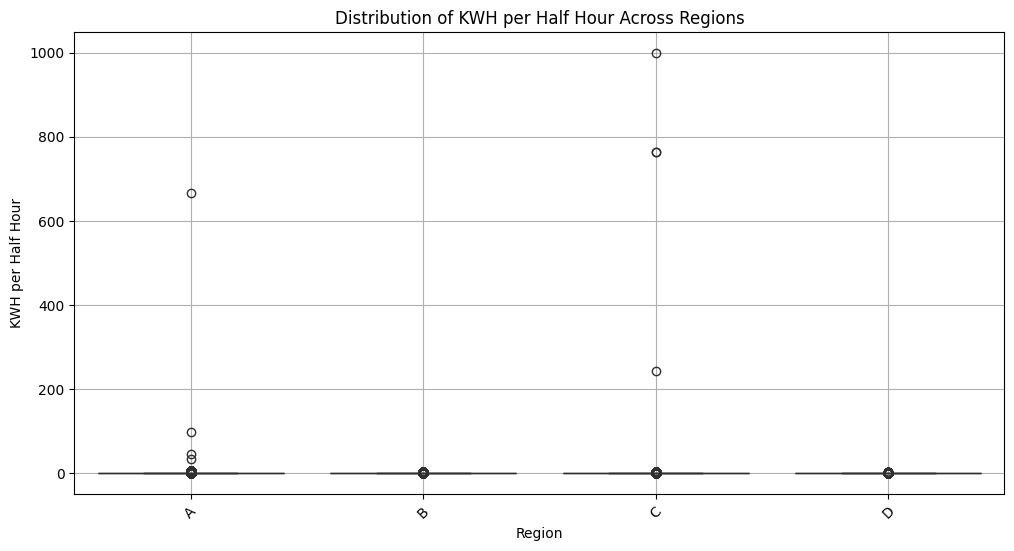

In [44]:
# Box plot to compare the distribution of KWH/hh (per half hour) across different regions
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='KWH/hh (per half hour) ', data=merged_dataset, palette=custom_colors)
plt.title('Distribution of KWH per Half Hour Across Regions')
plt.xlabel('Region')
plt.ylabel('KWH per Half Hour')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


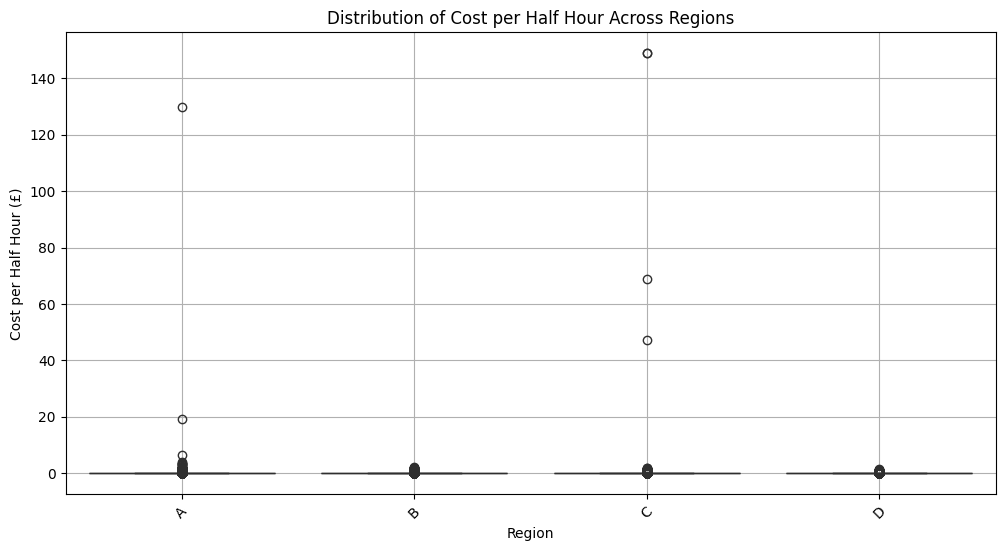

In [45]:
# Box plot to compare the distribution of Cost per Half Hour across different regions
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='Cost_per_half_hour', data=merged_dataset, palette=custom_colors)
plt.title('Distribution of Cost per Half Hour Across Regions')
plt.xlabel('Region')
plt.ylabel('Cost per Half Hour (£)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

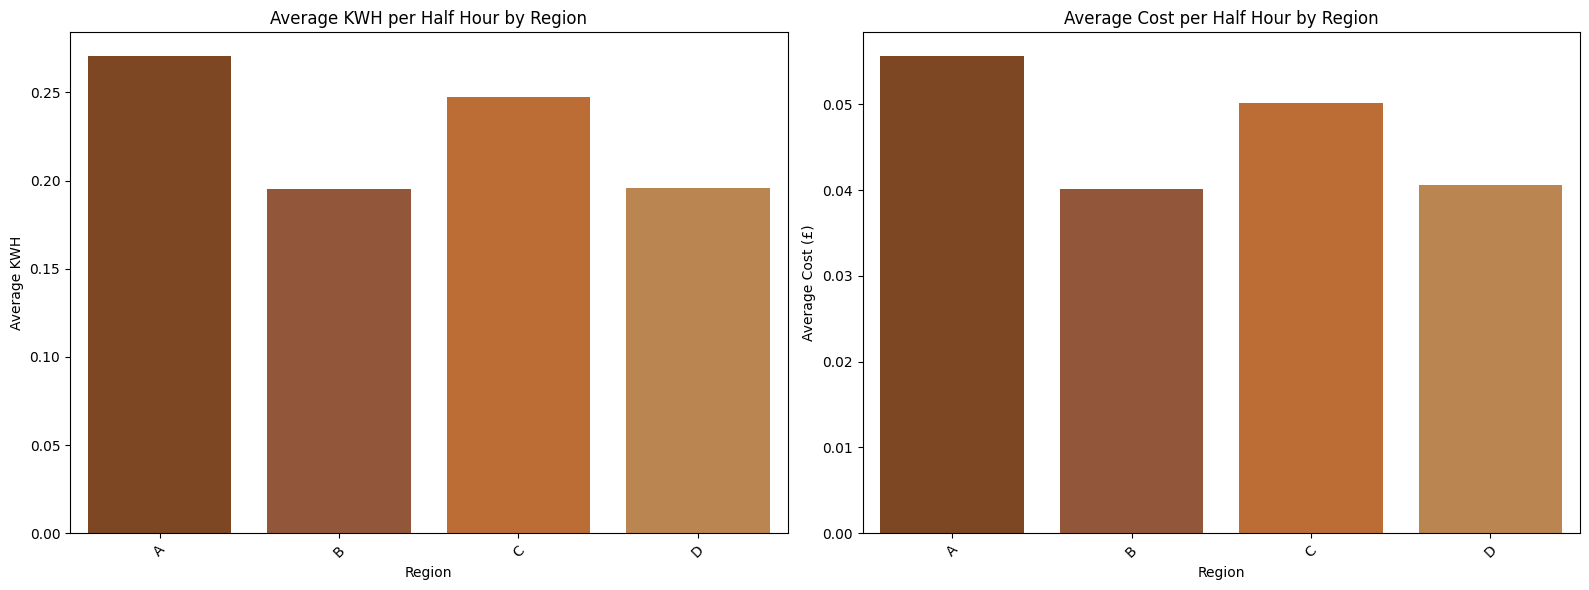

In [46]:
# Aggregate data to get average KWH and Cost for each region
region_analysis = merged_dataset.groupby('region').agg(
    Region_Avg_KWH=('KWH/hh (per half hour) ', 'mean'),
    Region_Avg_Cost=('Cost_per_half_hour', 'mean')
).reset_index()

# Create a figure with 2 bar charts side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Grouped Bar Chart for Region_Avg_KWH
sns.barplot(ax=axes[0], x='region', y='Region_Avg_KWH', data=region_analysis, palette=custom_colors)
axes[0].set_title('Average KWH per Half Hour by Region')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Average KWH')
axes[0].tick_params(axis='x', rotation=45)

# Grouped Bar Chart for Region_Avg_Cost
sns.barplot(ax=axes[1], x='region', y='Region_Avg_Cost', data=region_analysis, palette=custom_colors)
axes[1].set_title('Average Cost per Half Hour by Region')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Average Cost (£)')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## **5. Site-Specific Metrics**

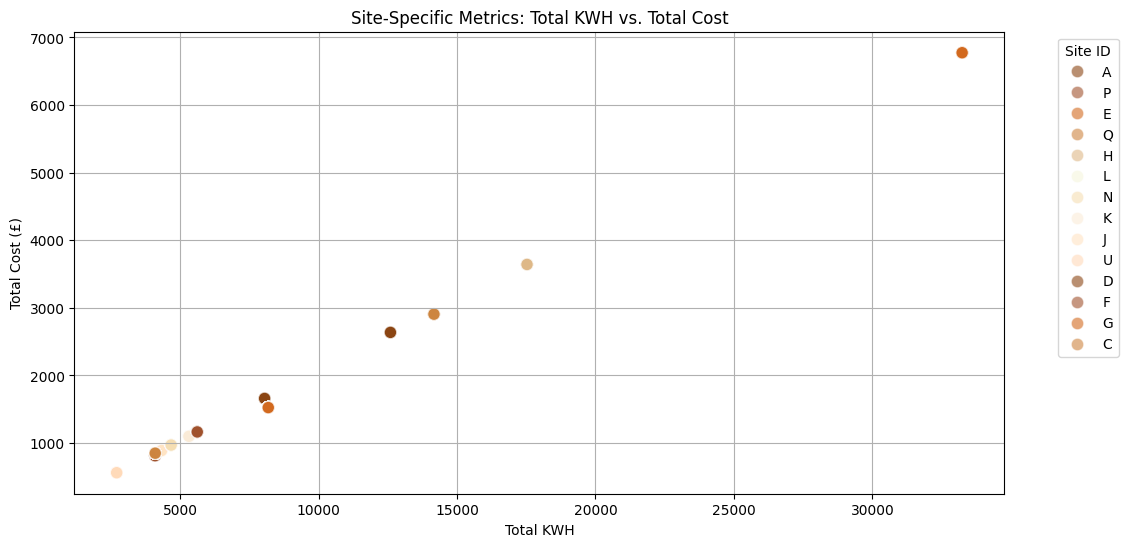

In [47]:
# Scatter plot to compare Site_Total_KWH vs. Site_Total_Cost
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Site_Total_KWH', y='Site_Total_Cost', data=merged_dataset, hue='site_id', palette=custom_colors, s=80, alpha=0.6)
plt.title('Site-Specific Metrics: Total KWH vs. Total Cost')
plt.xlabel('Total KWH')
plt.ylabel('Total Cost (£)')
plt.legend(title='Site ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [48]:
# Treemap to show the contribution of each site to total energy consumption (KWH)
fig = px.treemap(merged_dataset,
                 path=['site_id'],
                 values='Site_Total_KWH',
                 color='Site_Total_KWH',
                 hover_data=['site_id', 'Site_Total_KWH'],
                 color_continuous_scale=custom_colors,
                 title='Treemap: Site Contribution to Total Energy Consumption (KWH)'
)

fig.show()

# Treemap for total cost contribution
fig = px.treemap(merged_dataset,
                 path=['site_id'],
                 values='Site_Total_Cost',
                 color='Site_Total_Cost',
                 hover_data=['site_id', 'Site_Total_Cost'],
                 color_continuous_scale=custom_colors,
                 title='Treemap: Site Contribution to Total Cost (£)'
)

fig.show()

## **6. Energy Consumption Patterns**

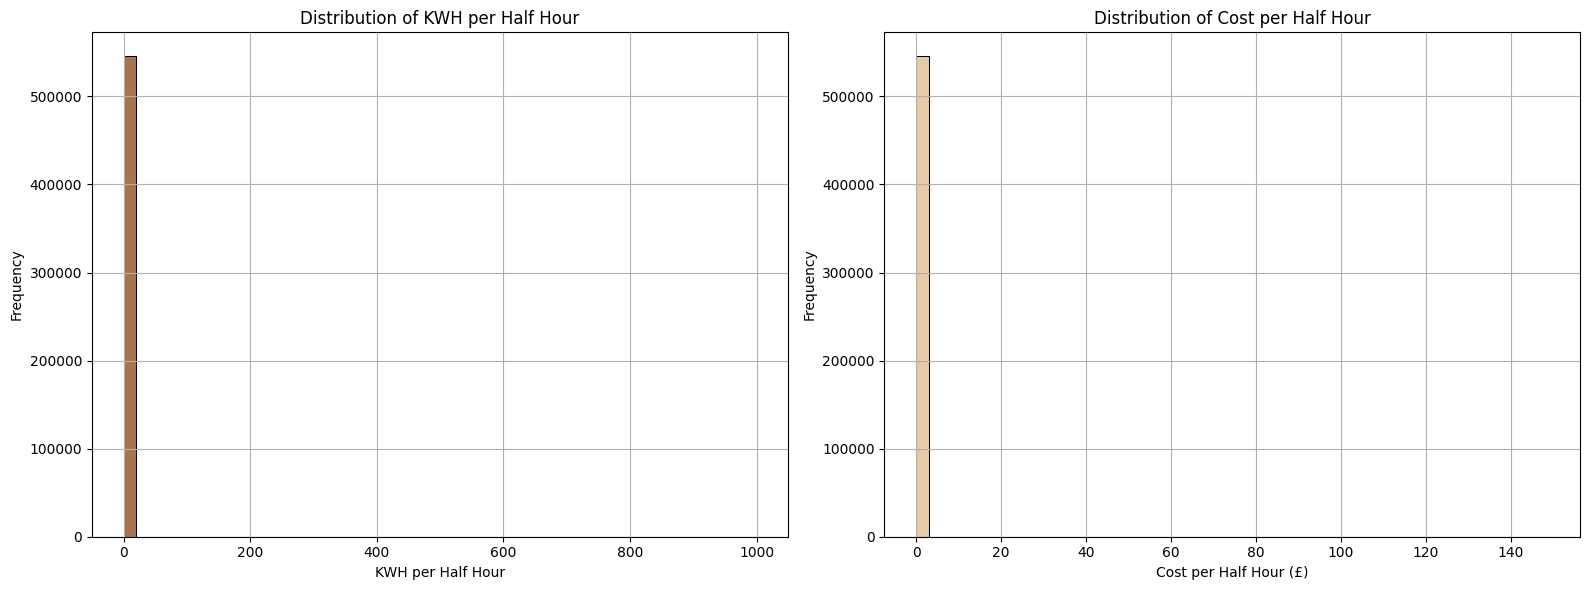

In [49]:
# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the distribution of KWH/hh (per half hour) on the first subplot
sns.histplot(merged_dataset['KWH/hh (per half hour) '], bins=50, kde=False, color='#8B4513', ax=axes[0])
axes[0].set_title('Distribution of KWH per Half Hour')
axes[0].set_xlabel('KWH per Half Hour')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

# Plot the distribution of Cost_per_half_hour on the second subplot
sns.histplot(merged_dataset['Cost_per_half_hour'], bins=50, kde=False, color='#DEB887', ax=axes[1])
axes[1].set_title('Distribution of Cost per Half Hour')
axes[1].set_xlabel('Cost per Half Hour (£)')
axes[1].set_ylabel('Frequency')
axes[1].grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

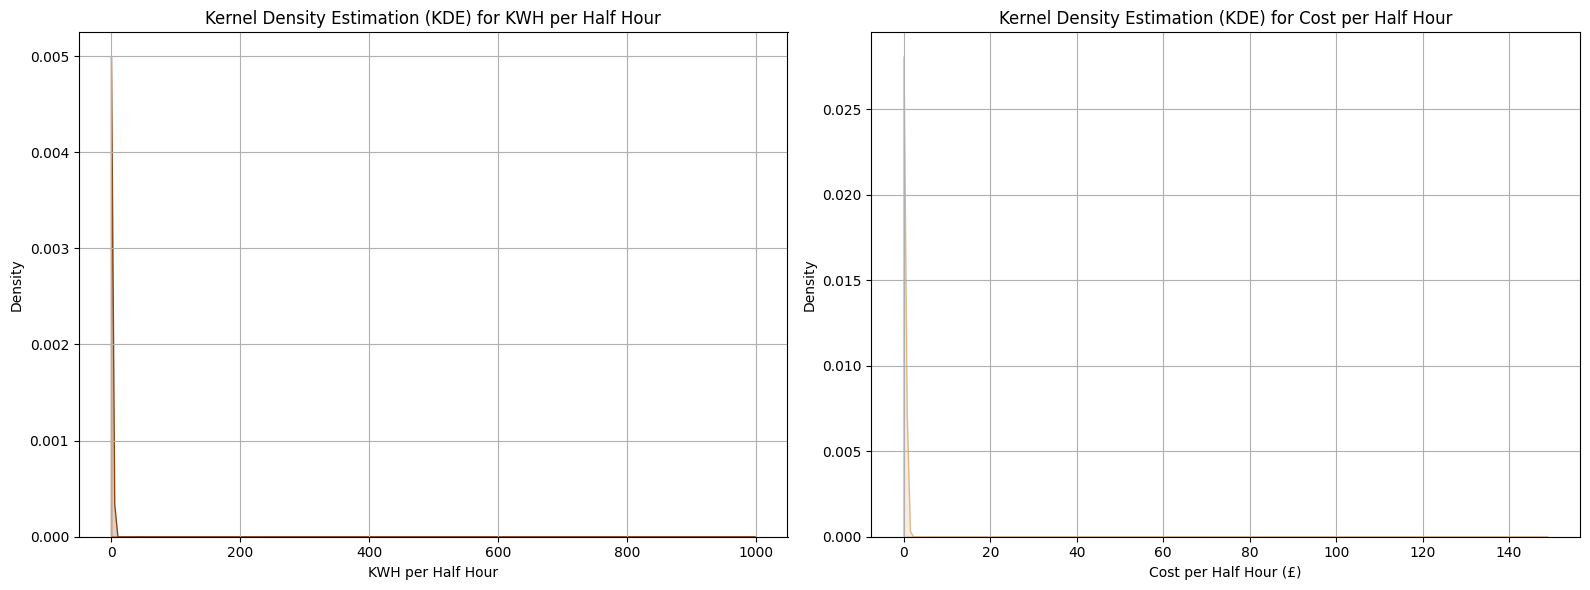

In [50]:
# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# KDE plot for KWH/hh (per half hour)
sns.kdeplot(merged_dataset['KWH/hh (per half hour) '], color='#8B4513', shade=True, ax=axes[0])
axes[0].set_title('Kernel Density Estimation (KDE) for KWH per Half Hour')
axes[0].set_xlabel('KWH per Half Hour')
axes[0].set_ylabel('Density')
axes[0].grid(True)

# KDE plot for Cost_per_half_hour
sns.kdeplot(merged_dataset['Cost_per_half_hour'], color='#DEB887', shade=True, ax=axes[1])
axes[1].set_title('Kernel Density Estimation (KDE) for Cost per Half Hour')
axes[1].set_xlabel('Cost per Half Hour (£)')
axes[1].set_ylabel('Density')
axes[1].grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## **7. Correlations and Relationships**

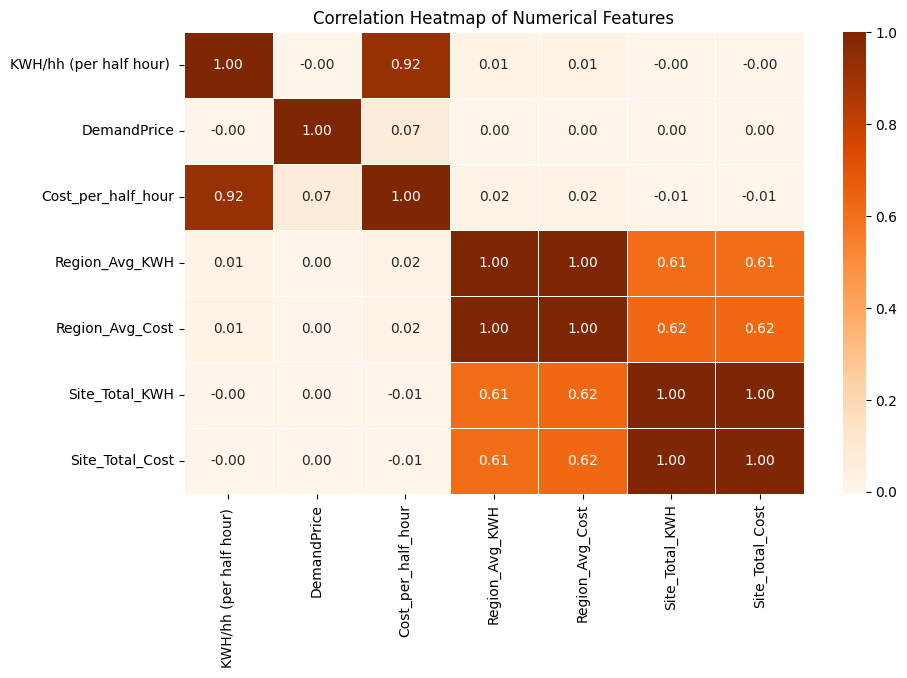

In [53]:
# Select the numerical columns for the correlation analysis
numerical_features = ['KWH/hh (per half hour) ', 'DemandPrice', 'Cost_per_half_hour', 'Region_Avg_KWH', 'Region_Avg_Cost', 'Site_Total_KWH', 'Site_Total_Cost']

# Calculate the correlation matrix
corr_matrix = merged_dataset[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Oranges', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


# **Statistical Hypothesis Testing**

### **Q1- Does the energy consumption (`KWH/hh`) vary significantly by day of the week?**

- **Null Hypothesis (𝐻0): There is no significant difference in energy consumption (`KWH/hh`) across the days of the week.**
- **Alternative Hypothesis (𝐻𝑎): There is a significant difference in energy consumption (`KWH/hh`) across the days of the week.**

In [56]:
groups = [merged_dataset[merged_dataset['Day_of_Week'] == day]['KWH/hh (per half hour) '] for day in range(7)]

# Perform One-Way ANOVA
anova_result = f_oneway(*groups)
print("ANOVA p-value:", anova_result.pvalue)

# If non-parametric needed:
kruskal_result = kruskal(*groups)
print("Kruskal-Wallis p-value:", kruskal_result.pvalue)


ANOVA p-value: 0.5713704535159854
Kruskal-Wallis p-value: 3.338674644720138e-06


### **Q2- Is there a correlation between `DemandPrice` and `Cost_per_half_hour`?**

- **Null Hypothesis (𝐻0): There is no significant correlation between `DemandPrice` and `Cost_per_half_hour`.**
- **Alternative Hypothesis (𝐻𝑎): There is a significant correlation between `DemandPrice` and `Cost_per_half_hour`.**

In [58]:
# Pearson correlation
pearson_corr, p_value = pearsonr(merged_dataset['DemandPrice'], merged_dataset['Cost_per_half_hour'])
print(f"Pearson correlation: {pearson_corr}, p-value: {p_value}")

# If non-parametric needed:
spearman_corr, p_value = spearmanr(merged_dataset['DemandPrice'], merged_dataset['Cost_per_half_hour'])
print(f"Spearman correlation: {spearman_corr}, p-value: {p_value}")

Pearson correlation: 0.07326543779358735, p-value: 0.0
Spearman correlation: 0.3003355178285321, p-value: 0.0


In [61]:
for day in range(7):
    stat, p = shapiro(merged_dataset[merged_dataset['Day_of_Week'] == day]['KWH/hh (per half hour) '])
    print(f"Day {day} normality p-value:", p)

# Homogeneity of variances
from scipy.stats import levene

levene_stat, levene_p = levene(*groups)
print("Levene test p-value:", levene_p)

Day 0 normality p-value: 2.1764439787001657e-177
Day 1 normality p-value: 8.241299837305786e-179
Day 2 normality p-value: 2.5212118820069614e-146
Day 3 normality p-value: 9.642872853216613e-147
Day 4 normality p-value: 8.97713757649341e-148
Day 5 normality p-value: 7.910156312530853e-176
Day 6 normality p-value: 5.7708170864949204e-176
Levene test p-value: 0.6394534710037147


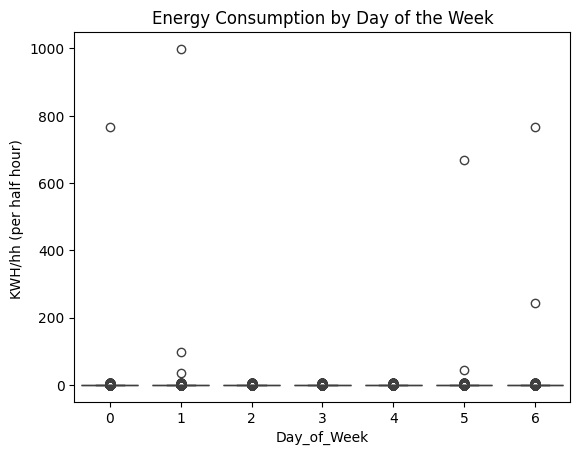

In [63]:
sns.boxplot(x='Day_of_Week', y='KWH/hh (per half hour) ', data=merged_dataset)
plt.title("Energy Consumption by Day of the Week")
plt.show()

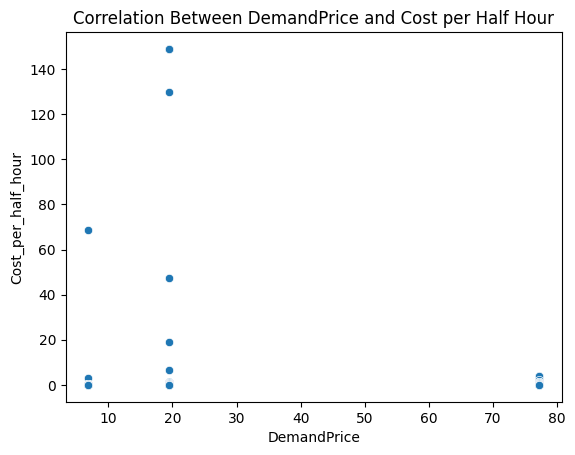

In [64]:
sns.scatterplot(x='DemandPrice', y='Cost_per_half_hour', data=merged_dataset)
plt.title("Correlation Between DemandPrice and Cost per Half Hour")
plt.show()

In [66]:
def calculate_cost_savings(data, threshold):
    """
    Calculate potential KW and EGP savings based on the threshold.
    :param data: DataFrame containing the relevant data.
    :param threshold: KWH threshold for shutting down cells.
    :return: Total KW savings, Total EGP savings
    """
    # Filter cells that can be shut down based on the threshold
    shutdown_cells = data[data['KWH/hh (per half hour) '] < threshold]

    # Calculate total KW savings
    kw_savings = shutdown_cells['KWH/hh (per half hour) '].sum()

    # Calculate cost savings based on different demand prices
    demand_price_mapping = {
        'High': 3.0,  # Example price per KW
        'Normal': 2.0,
        'Low': 1.0
    }

    shutdown_cells['DemandPriceFactor'] = shutdown_cells['Demand'].map(demand_price_mapping)
    shutdown_cells['CostSavings'] = shutdown_cells['KWH/hh (per half hour) '] * shutdown_cells['DemandPriceFactor']
    egp_savings = shutdown_cells['CostSavings'].sum()

    return kw_savings, egp_savings


In [69]:
def determine_threshold(data):
    """
    Logical approach to determine a threshold.
    This example uses the mean minus standard deviation.
    :param data: DataFrame containing the relevant data.
    :return: Calculated threshold
    """
    threshold = data['KWH/hh (per half hour) '].mean() - data['KWH/hh (per half hour) '].std()
    return max(threshold, 0)

In [70]:
# Apply the logic to determine the threshold
threshold = determine_threshold(merged_dataset)
print(f"Determined Threshold: {threshold} KWH")

# Calculate cost savings based on the determined threshold
kw_savings, egp_savings = calculate_cost_savings(merged_dataset, threshold)

# Display the results
print(f"Potential KW Savings: {kw_savings} KW")
print(f"Potential EGP Savings: {egp_savings} EGP")


Determined Threshold: 0 KWH
Potential KW Savings: 0.0 KW
Potential EGP Savings: 0.0 EGP


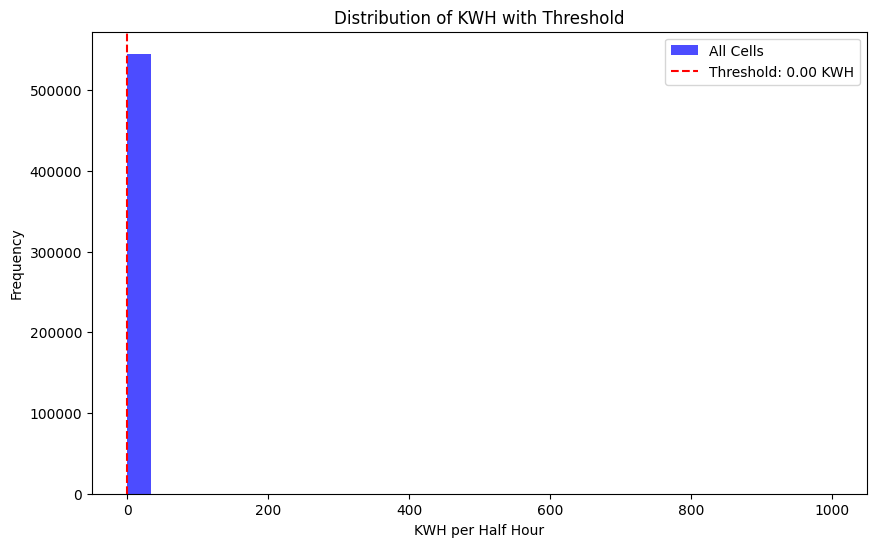

In [71]:
plt.figure(figsize=(10, 6))
plt.hist(merged_dataset['KWH/hh (per half hour) '], bins=30, color='blue', alpha=0.7, label='All Cells')
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold: {threshold:.2f} KWH')
plt.title("Distribution of KWH with Threshold")
plt.xlabel("KWH per Half Hour")
plt.ylabel("Frequency")
plt.legend()
plt.show()